## Final Project Submission

Please fill out:
* Student name: Lyndsay Maggin
* Student pace: self paced
* Scheduled project review date/time: Aug 2020
* Instructor name: NA
* Blog post URL:


In [1]:
#Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

### Understanding the available data:

In [2]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')#box office mojo
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')#imbd
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')#imbd
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')#imbd
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')#imbd
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')#imbd
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')#imbd
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')#rotten tomatoes
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',  sep='\t', encoding="cp1252")#rotten tomatoes
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')#the movie db
tn_movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [3]:
dfs = [bom_movie_gross, imdb_name, imdb_title_akas, imdb_title_basics, imdb_title_crew, 
      imdb_title_principals, imdb_title_ratings, rt_movie_info, rt_reviews, 
      tmdb_movies, tn_movie_budget]

In [4]:
print(bom_movie_gross.shape)
bom_movie_gross.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
print(imdb_name.shape)
imdb_name.head()

(606648, 6)


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
print(imdb_title_akas.shape)
imdb_title_akas.head()

(331703, 8)


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [7]:
print(imdb_title_basics.shape)
imdb_title_basics.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
print(imdb_title_crew.shape)
imdb_title_crew.head()

(146144, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
print(imdb_title_principals.shape)
imdb_title_principals.head()

(1028186, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
print(imdb_title_ratings.shape)
imdb_title_ratings.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
print(rt_movie_info.shape)
rt_movie_info.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
print(rt_reviews.shape)
rt_reviews.head()

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
print(tmdb_movies.shape)
tmdb_movies.head()

(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
print(tn_movie_budget.shape)
tn_movie_budget.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# The Project

### Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

#### For this project I will measure film success and popularity on total gross revenue. I will focus on domestic revenue, given Microsoft will test this initiative in the US to start. It is my original assumption that popularity is dependent on the following:

        1. Actors
        2. Directors
        3. Genre
        4. Budget (special effects)
        5. Story is based off of a book, graphic novel or comic
        
#### In addition, viewer preferences adjust over time. Therefore I will also weight more recent years more heavily than historical films in my analysis. 

The IMDB data gives me title, genre, actor, and director. I will therefore join the dataframes together to create one table. I can then use the IMDB API to pull in year and gross revenue and add to my table. From here I can scrape the IMDB website for a list of movies based on comics or graphic novels and add a binomial to my dataframe. I can then analyze this dataframe using time as a factor to uncover the biggest factor contributors to revenue. 

1. Look at top grossing movies annually for the last 10 years using bom_movie_gross

In [15]:
#how many years of data do we have?
years = list(set(bom_movie_gross['year']))
years.sort()
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

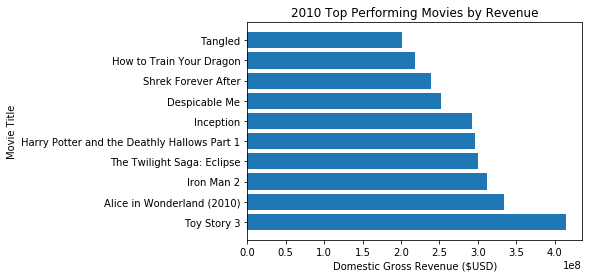

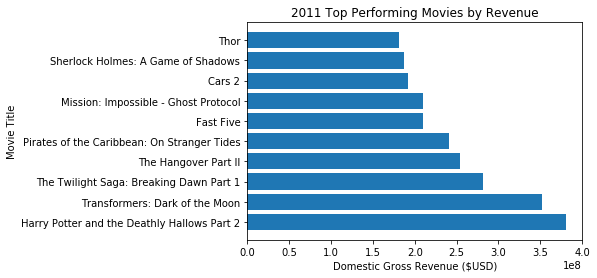

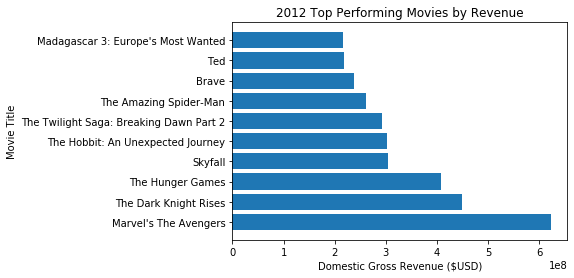

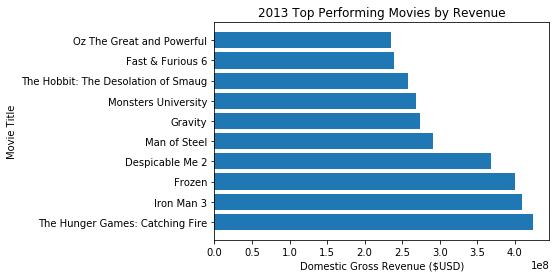

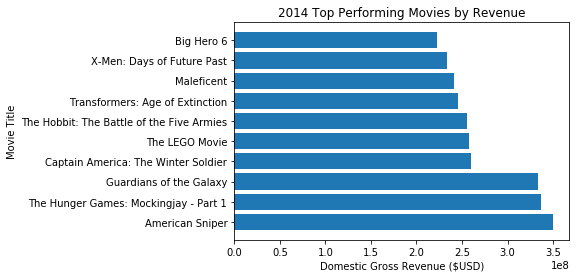

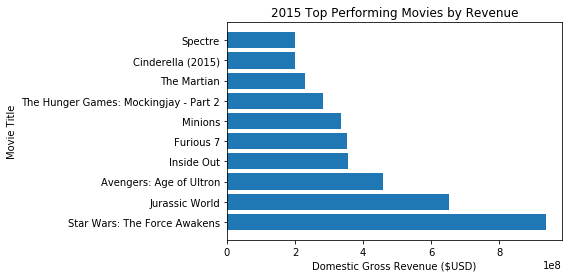

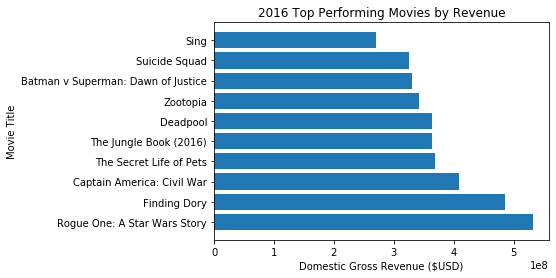

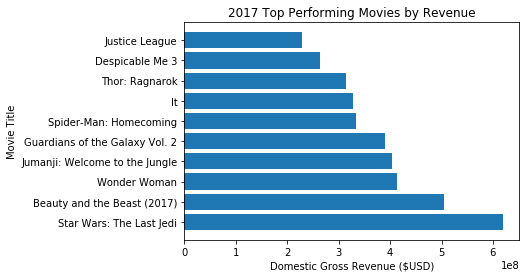

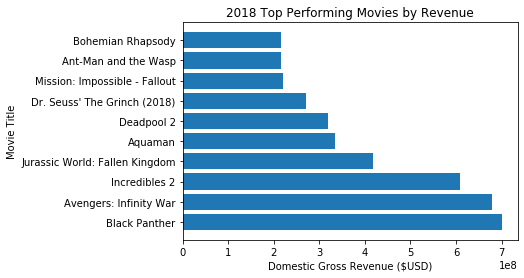

In [16]:
#what were the top 10 performing movies each year based on revenue?

def top_10(data, year):
    df = data[data['year'] == year]
    df = df.sort_values('domestic_gross', ascending= False).head(10)
    plt.barh(df['title'],df['domestic_gross'])
    plt.ylabel('Movie Title')
    plt.xlabel('Domestic Gross Revenue ($USD)')
    plt.title('{} Top Performing Movies by Revenue'.format(year))
    plt.show()

for year in years:
    top_10(bom_movie_gross, year)

In [17]:
type(tn_movie_budget['release_date'][0])
#tn_movie_budget.dtypes
#date is string, need to convert to date to pull out the year and group by year
from datetime import datetime
tn_movie_budget['release_date'] = pd.to_datetime(tn_movie_budget['release_date'])
tn_movie_budget['year'] = tn_movie_budget['release_date'].dt.year


In [18]:
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [19]:
def rem_str(column):
    tn_movie_budget[column] = tn_movie_budget[column].str.replace('$' , '')
    tn_movie_budget[column] = tn_movie_budget[column].str.replace(',' , '')
    tn_movie_budget[column] = pd.to_numeric(tn_movie_budget[column])
    return(tn_movie_budget)

rem_str('production_budget')
rem_str('domestic_gross')
rem_str('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [22]:
tn_movie_budget.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007
8,9,2017-11-17,Justice League,300000000,229024295,655945209,2017
9,10,2015-11-06,Spectre,300000000,200074175,879620923,2015


In [23]:
tn_movie_budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
year                          int64
dtype: object

In [24]:
tn_movie_budget.sort_values(by='worldwide_gross', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
...,...,...,...,...,...,...,...
5474,75,2005-12-31,Insomnia Manica,500000,0,0,2005
5473,74,2012-07-17,Girls Gone Dead,500000,0,0,2012
5472,73,2012-04-03,Enter Nowhere,500000,0,0,2012
5471,72,2010-12-31,Drones,500000,0,0,2010


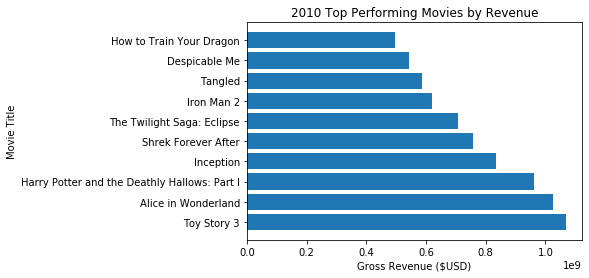

C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


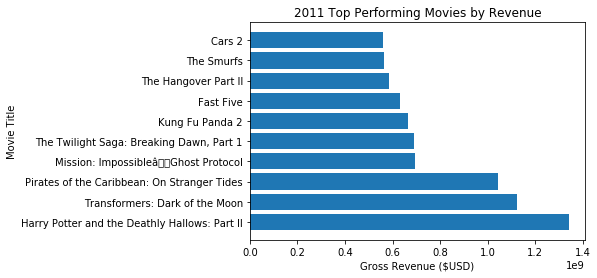

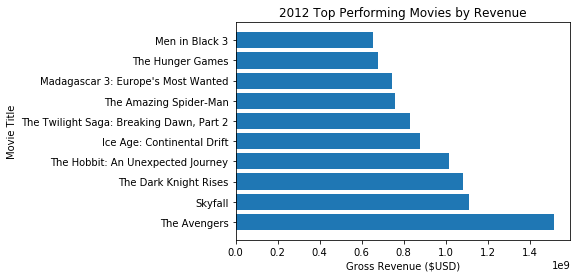

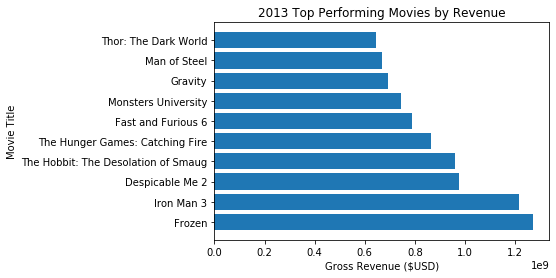

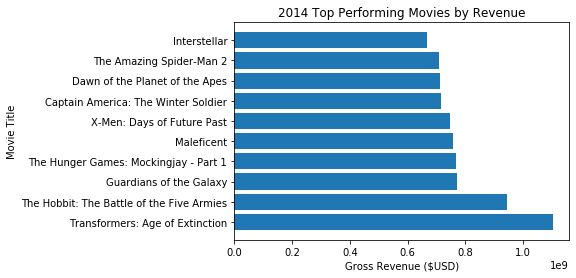

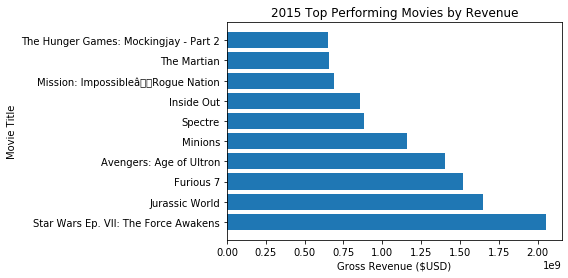

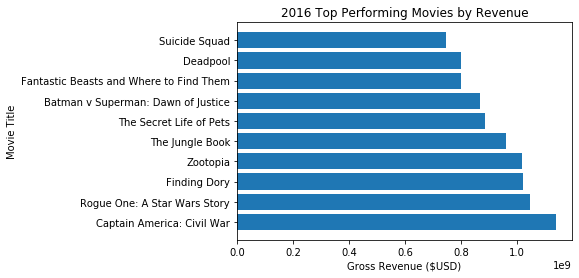

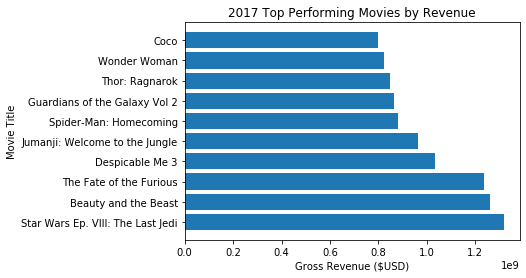

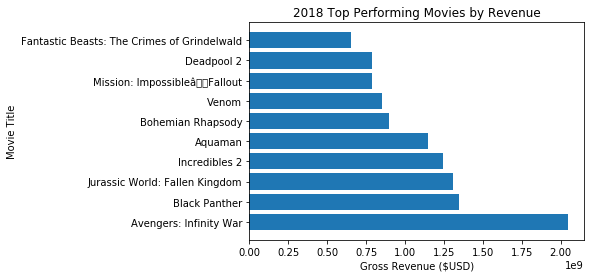

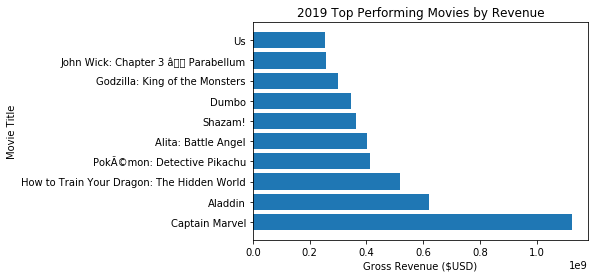

In [25]:
def top_10(data, year):
    df = data[data['year'] == year]
    df = df.sort_values('worldwide_gross', ascending= False).head(10)
    plt.barh(df['movie'],df['worldwide_gross'])
    plt.ylabel('Movie Title')
    plt.xlabel('Gross Revenue ($USD)')
    plt.title('{} Top Performing Movies by Revenue'.format(year))
    plt.show()

years = list(set(tn_movie_budget['year']))
years.sort()
years = years[-11:-1]
years.sort()
for year in years:
    top_10(tn_movie_budget, year)

Looking at the past 10 years the largest movie money makers are based off of comic books, books or stories. 90% of the top performers in the last ten years are Marvel movies. 

2. Are there genre commonalities? 

In [26]:
#create a function to join tables by setting their indices
def joined(df1, df2, ind1, ind2):
    df1 = df1.set_index(ind1)
    df2 = df2.set_index(ind2)
    join_df = df1.join(df2, how="left").reset_index()
    return join_df


In [27]:
imdb_title_akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [28]:
imdb_title_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [29]:
#join imbd tables so that I can see genre, I do not want to use another source table for this join
# in case there are discrepencies amongst data
join = joined(imdb_title_akas, imdb_title_basics, 'title_id', 'tconst')
join.head(1)
genre = join[['index','title', 'start_year', 'genres', 'runtime_minutes', 'region']]
genre = genre.drop_duplicates(subset=['title'])
genre.head()

,index,title,start_year,genres,runtime_minutes,region
0,tt0063540,Sangharsh,2013,"Action,Crime,Drama",175.0,IN
1,tt0063540,Sunghursh,2013,"Action,Crime,Drama",175.0,NaN
4,tt0063540,Sungharsh,2013,"Action,Crime,Drama",175.0,IN
5,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",114.0,XWW
6,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",114.0,IN


In [30]:
tn_movie_budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
year                          int64
dtype: object

In [31]:
#now I am adding tn_movie_budget so that we can sort by top grossing movies
joined_df = joined(genre, tn_movie_budget, 'title', 'movie').sort_values('worldwide_gross', ascending= False).dropna()

In [32]:
joined_df.head()

,level_0,index,start_year,genres,runtime_minutes,region,id,release_date,production_budget,domestic_gross,worldwide_gross,year
20971,Avatar,tt1775309,2011,Horror,93.0,XWW,1.0,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009.0
21033,Avengers: Infinity War,tt4154756,2018,"Action,Adventure,Sci-Fi",149.0,AR,7.0,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018.0
96579,Jurassic World,tt0369610,2015,"Action,Adventure,Sci-Fi",124.0,FR,34.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015.0
70993,Furious 7,tt2820852,2015,"Action,Crime,Thriller",137.0,NL,67.0,2015-04-03,190000000.0,353007020.0,1.518723e+09,2015.0
21026,Avengers: Age of Ultron,tt2395427,2015,"Action,Adventure,Sci-Fi",141.0,US,4.0,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015.0


In [33]:
joined_df.rename(columns={'level_0':'title'}, inplace=True)

In [34]:
joined_df.head(1)

,title,index,start_year,genres,runtime_minutes,region,id,release_date,production_budget,domestic_gross,worldwide_gross,year
20971,Avatar,tt1775309,2011,Horror,93.0,XWW,1.0,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009.0


In [35]:
imdb_title_basics[imdb_title_basics['primary_title']=='Avatar'] 
#Avatar is not a horror movie, I therefore do not trust this data source and am looking for another

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


3. I found that the datasets provided did not have reliable data since Avatar is not a horror film. I found omdb to be more reliable and tested on the Avatar movie:


In [36]:
import requests
title = 'Avatar'
url = "http://www.omdbapi.com/?t={}&apikey=b6286af4".format(title)
response = requests.request("GET", url)
rsp = response.json()
print(rsp['Title'],':', rsp['Genre'])

#as you can see Avatart is Action and Adventure. The Genres are also alphabetical

Avatar : Action, Adventure, Fantasy, Sci-Fi


Unfortunately I do not have access to many api pulls for the OMDB API. I therefore will use the API to replace the Avatar genre given that Avatar is the largest grossing movie in my dataset. However I do not know if there are any incorrect genre's elsewhere. Ideally I would replace all movie genres with OMDB which is correct. Unfortunately the free API is not forgiving enough for this dataset. 

In [37]:
avatar_genre = rsp['Genre']

In [38]:
joined_df.loc[joined_df['title'] == 'Avatar', 'genres'] = avatar_genre

In [39]:
joined_df.shape

(1687, 12)

In [40]:
joined_df.head()

,title,index,start_year,genres,runtime_minutes,region,id,release_date,production_budget,domestic_gross,worldwide_gross,year
20971,Avatar,tt1775309,2011,"Action, Adventure, Fantasy, Sci-Fi",93.0,XWW,1.0,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009.0
21033,Avengers: Infinity War,tt4154756,2018,"Action,Adventure,Sci-Fi",149.0,AR,7.0,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018.0
96579,Jurassic World,tt0369610,2015,"Action,Adventure,Sci-Fi",124.0,FR,34.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015.0
70993,Furious 7,tt2820852,2015,"Action,Crime,Thriller",137.0,NL,67.0,2015-04-03,190000000.0,353007020.0,1.518723e+09,2015.0
21026,Avengers: Age of Ultron,tt2395427,2015,"Action,Adventure,Sci-Fi",141.0,US,4.0,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015.0


In [41]:
table = pd.pivot_table(joined_df, values='worldwide_gross', index=['genres'], aggfunc=np.sum)

In [43]:
table.sort_values('worldwide_gross', ascending = False).to_csv('genre_gross.csv')
#from the below table, action/adventure are the largest grossing movies over the past 10 years


4. Correlation between revenue and production budget?

In [44]:
corr_df = joined_df[['production_budget', 'worldwide_gross']]
corr_df.corr()
# I also found that there is high positive correlation between production budget and gross revenue but this does not mean causation

,production_budget,worldwide_gross
production_budget,1.000000,0.782546
worldwide_gross,0.782546,1.000000


In [48]:
corr_df = joined_df[['runtime_minutes', 'worldwide_gross']]
corr_df.corr()
#there is a lower correlation between runtime and gross revenue

,runtime_minutes,worldwide_gross
runtime_minutes,1.000000,0.249418
worldwide_gross,0.249418,1.000000


Pull in the top 50 productions over the last year. Is there any correlation with production company or director?

In [49]:
top_50 = joined_df.sort_values('worldwide_gross', ascending = False)[:50]
top_50_ids = top_50['index']

top_50['director'] = np.nan
top_50['production'] = np.nan
top_50['rotten_t'] = np.nan


for imdb_id in top_50_ids:
    url = "http://www.omdbapi.com/?i={}&apikey=b6286af4".format(imdb_id)
    response = requests.request("GET", url)
    rsp = response.json()
    director = rsp['Director']
    production = rsp['Production']
    
    top_50.loc[top_50['index'] == imdb_id, 'director'] = director
    top_50.loc[top_50['index'] == imdb_id, 'production'] = production

    

In [50]:
top_50

,title,index,start_year,genres,runtime_minutes,region,id,release_date,production_budget,domestic_gross,worldwide_gross,year,director,production,rotten_t
20971,Avatar,tt1775309,2011,"Action, Adventure, Fantasy, Sci-Fi",93.0,XWW,1.0,2009-12-18,425000000.0,760507625.0,2.776345e+09,2009.0,Atsushi Wada,N/A,NaN
21033,Avengers: Infinity War,tt4154756,2018,"Action,Adventure,Sci-Fi",149.0,AR,7.0,2018-04-27,300000000.0,678815482.0,2.048134e+09,2018.0,"Anthony Russo, Joe Russo",Walt Disney Pictures,NaN
96579,Jurassic World,tt0369610,2015,"Action,Adventure,Sci-Fi",124.0,FR,34.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,2015.0,Colin Trevorrow,Universal Pictures,NaN
70993,Furious 7,tt2820852,2015,"Action,Crime,Thriller",137.0,NL,67.0,2015-04-03,190000000.0,353007020.0,1.518723e+09,2015.0,James Wan,Universal Pictures,NaN
21026,Avengers: Age of Ultron,tt2395427,2015,"Action,Adventure,Sci-Fi",141.0,US,4.0,2015-05-01,330600000.0,459005868.0,1.403014e+09,2015.0,Joss Whedon,Walt Disney Pictures,NaN
28447,Black Panther,tt1825683,2018,"Action,Adventure,Sci-Fi",134.0,FR,42.0,2018-02-16,200000000.0,700059566.0,1.348258e+09,2018.0,Ryan Coogler,Marvel Studios,NaN
96587,Jurassic World: Fallen Kingdom,tt4881806,2018,"Action,Adventure,Sci-Fi",128.0,US,13.0,2018-06-22,170000000.0,417719760.0,1.305773e+09,2018.0,J.A. Bayona,Universal Pictures,NaN
70513,Frozen,tt1323045,2010,"Adventure,Drama,Sport",93.0,SE,56.0,2013-11-22,150000000.0,400738009.0,1.272470e+09,2013.0,Adam Green,Anchor Bay,NaN
24802,Beauty and the Beast,tt2316801,2014,"Drama,Fantasy,Romance",112.0,XWW,35.0,2017-03-17,160000000.0,504014165.0,1.259200e+09,2017.0,Christophe Gans,Shout! Factory Films,NaN
90012,Incredibles 2,tt3606756,2018,"Action,Adventure,Animation",118.0,US,44.0,2018-06-15,200000000.0,608581744.0,1.242521e+09,2018.0,Brad Bird,Disney/Pixar,NaN


In [51]:
prod = top_50.groupby(['production'])[['worldwide_gross']].mean().sort_values('worldwide_gross', ascending= False)
prod = prod.reset_index()


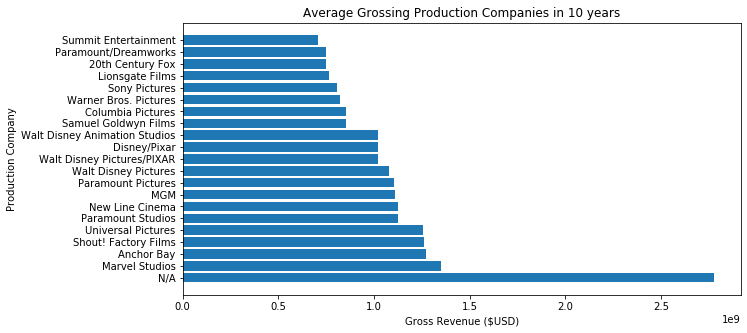

In [52]:
plt.figure(figsize=(10,5))
plt.barh(prod['production'],prod['worldwide_gross'])
plt.ylabel('Production Company')
plt.xlabel('Gross Revenue ($USD)')
plt.title('Average Grossing Production Companies in 10 years')
plt.show()

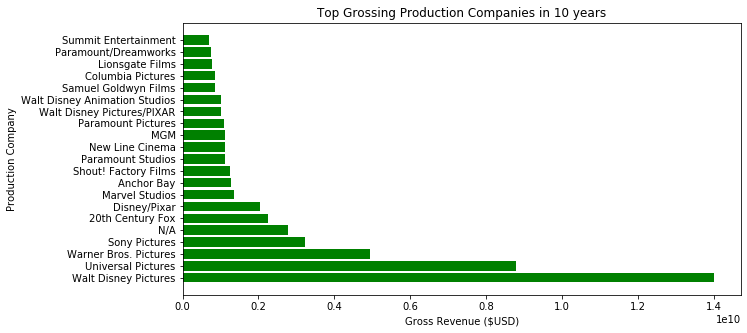

In [53]:
prod = top_50.groupby(['production'])[['worldwide_gross']].sum().sort_values('worldwide_gross', ascending= False)
prod = prod.reset_index()

plt.figure(figsize=(10,5))
plt.barh(prod['production'],prod['worldwide_gross'], color = 'green')
plt.ylabel('Production Company')
plt.xlabel('Gross Revenue ($USD)')
plt.title('Top Grossing Production Companies in 10 years')
plt.show()

In [54]:
direct = top_50.groupby(['director'])[['worldwide_gross']].mean().sort_values('worldwide_gross', ascending= False)
direct = direct.reset_index()

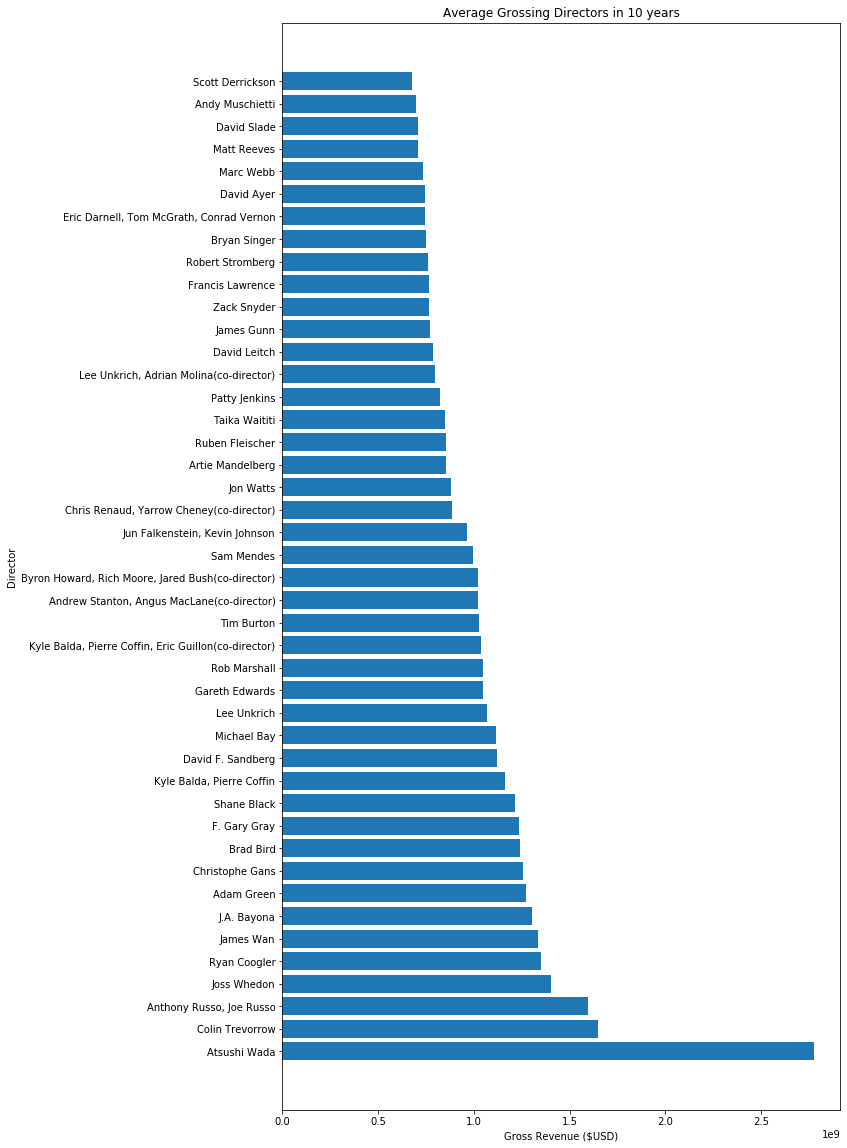

In [55]:
plt.figure(figsize=(10,20))
plt.barh(direct['director'],direct['worldwide_gross'])
plt.ylabel('Director')
plt.xlabel('Gross Revenue ($USD)')
plt.title('Average Grossing Directors in 10 years')
plt.show()

#Atsushi actually does short animated films

In [56]:
direct = top_50.groupby(['director'])[['worldwide_gross']].sum().sort_values('worldwide_gross', ascending= False)
direct = direct.reset_index()

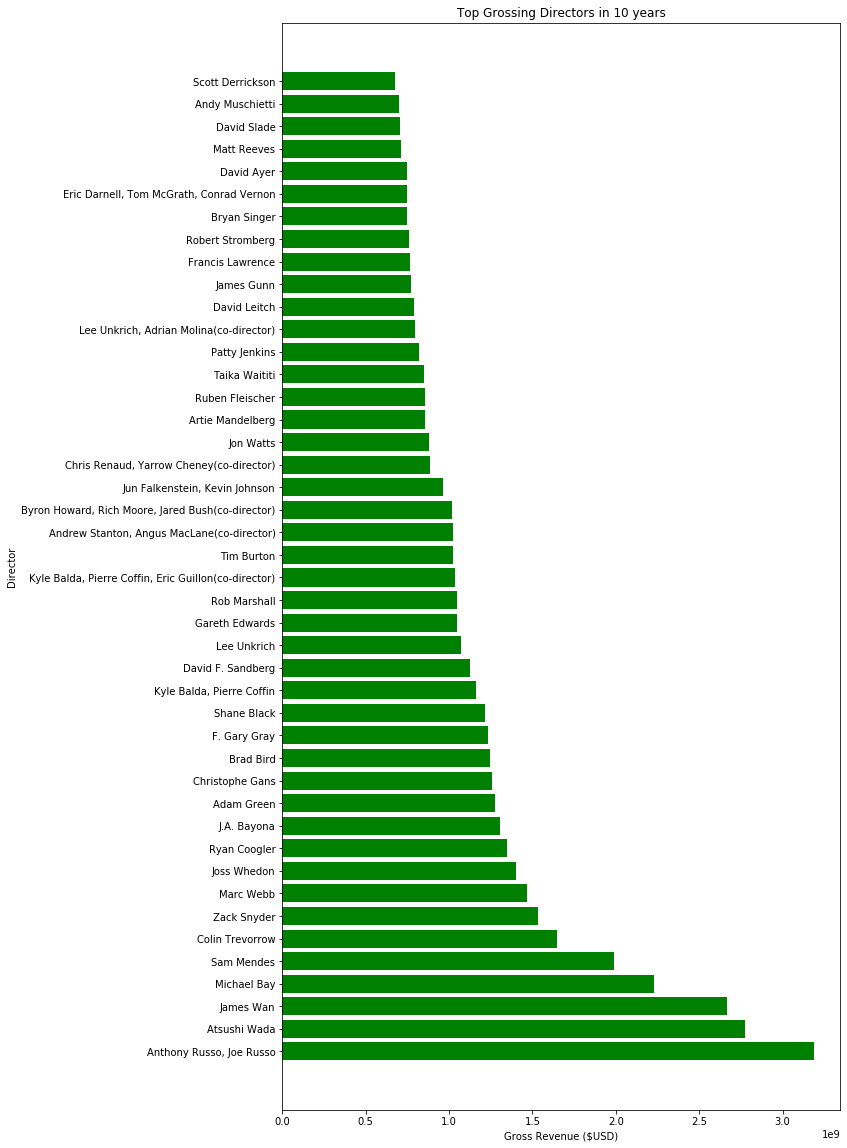

In [57]:
plt.figure(figsize=(10,20))
plt.barh(direct['director'],direct['worldwide_gross'], color = 'green')
plt.ylabel('Director')
plt.xlabel('Gross Revenue ($USD)')
plt.title('Top Grossing Directors in 10 years')
plt.show()


Anthony Russo Produces all Marvel films

#### Based on the above analysis using multiple datasets, Microsoft should test their media production with a Marvel comic. The Marvel movies have consistently been the top grossing movie each year for the past 10 years. In addition, action/adventure movies have been top performers over the past 10 years. Surprisingly, movie financial success is not dependent on director, therefore Microsoft could use another director other than Russo. For instance Atsushi Wada is an animated short film director while James Wan is a horror film producer and director. Both directed films over the past 10 years that in aggregate resulted in similar revenue compared to Russo who directed every Marvel film the last 10 years. The question remains, what Marvel Comic should Microsoft produce? 